# GDP Data Exploration

In [1]:
import AidUtilities as aid_utils
import AidUtilities.utilities as utils

In [2]:
from importlib import reload

In [3]:
reload(utils)

<module 'AidUtilities.utilities' from '/home/gsandoval/Documents/Classes/depaul/Korea/Foreign_Aid/AidUtilities/utilities.py'>

In [4]:
import pandas as pd

In [34]:
from time import sleep

In [5]:
data_path = '/home/gsandoval/Documents/Classes/depaul/Korea/Data/'+\
            'WorldBank_GDP/LatinAmericaKorea_GDP_BySeries/LatAmKorea_GDP_Data.txt'
gdp_data = pd.read_csv(data_path, sep='\t', skipfooter=5)

/home/gsandoval/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [6]:
gdp_data.head(2)

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,12.904163,...,6.998734,5.781744,6.052918,6.712704,5.156686,6.264566,5.231622,4.537879,5.111017,5.932404
1,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,Belize,BLZ,NaN,NaN,NaN,NaN,NaN,NaN,...,11.650448,13.425592,13.711682,13.723112,12.925764,11.099008,11.199907,9.557799,8.967972,10.709978


In [7]:
gdp_data = utils.clean_col_names(gdp_data)

In [8]:
gdp_data.head(2)

,Series_Name,Series_Code,Country_Name,Country_Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,12.904163,...,6.998734,5.781744,6.052918,6.712704,5.156686,6.264566,5.231622,4.537879,5.111017,5.932404
1,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,Belize,BLZ,NaN,NaN,NaN,NaN,NaN,NaN,...,11.650448,13.425592,13.711682,13.723112,12.925764,11.099008,11.199907,9.557799,8.967972,10.709978


In [9]:
def create_series_names(series_names, return_tuple=False):
    '''Designed to take in World Bank dataframe with multiple series(studies).
    Then ask for user input on what the new series name should be.
    If "quit" is entered as a value, the function exits and returns input values to that point.
    Args:
        series_names(pandas.series): expects a series of world bank series
        return_tuple(bool): 
            if True--returns a list of tuples. 
                the tuples contain (old_series_name, new_series_name)
            if False-- returns a list of strings that correspond to 
                the new name for each series
    Returns:
        List of either string elements of tuples.  The return object is based on return_tuple value.
    '''
    new_series_names = []
    for series in series_names:
        print(series)
        new_name = input('new name: ')
        if new_name == 'quit':
            return print(new_series_names)
        # return a list of tuples. 
        if return_tuple:
            new_series_names.append((old_series, new_name))
        else:
            new_series_names.append(new_name)
    return new_series_names

In [10]:
series_names = gdp_data.Series_Name.unique()
series_codes = gdp_data.Series_Code.unique()
print(len(series_codes))

51


In [13]:
# This is used to decide what to re-name the Series Name 
#utils.create_series_names(series_names)

In [14]:
new_series_names = [
    'AggForestFish_PctGDP', 'GovtDebt_Total', 'CoalRents_PctGDP',
    'HealthExp_PctGDP', 'Cred2Private_PctGDP', 'GovtHealth_PctGDP',
    'ExportsGoodServices_PctGDP', 'FinalConsumpExp_PctGDP', 'ForeignInvstOutflow_PctGDP',
    'GDP_2015USD', 'GDP_LCU_current', 'GDP_PctGrowth', 'PerCapita_GDP_LCU',
    'PerCapita_GDP_USD', 'PerEmployed_GDP_2017PPP', 'EnergyUnit_GDP_PPP',
    'GovtConsumption_PctGDP', 'DomSavings_PctGDP', 'Savings_PctGDP',
    'ImportGoodService_PctGDP', 'Inflation_Pct', 'Manufacturing_PctGDP',
    'MerchTrade_PctGDP', 'Mineral_PctGDP', 'NatGas_PctGDP',
    'Lend(+)Borrow(-)_PctGDP', 'Remittance_PctGDP', 'RevenueExGrants_PctGDP',
    'StocksTraded_PctGDP', 'NatResourcRents_PctGDP', 'InServiceTrade_PctGDP',
    'BroadMoney_PctGDP', 'CurrentAcctBal_PctGDP', 'CreditByFin_PctGDP', 'CreditByBanks_PctGDP',
    'Expense_PctGDP', 'ForeignInvstInflow_PctGDP', 'ForestRents_PctGDP',
    'GDP_LCU', 'GDP_USD', 'PerCapita_GDP_2015USD', 'PerCapita_GDP_LCU_current',
    'GDPGrowth_Pct', 'EducExp_PctGDP', 'Industry_PctGDP',
    'Defense_PctGDP', 'OilRents_PctGDP', 'RnD_PctGDP',
    'Services_PctGDP', 'Trade_PctGDP', 'TaxRev_PctGDP']

In [15]:
print(len(new_series_names))
print(len(series_names))

51
51


In [16]:
# merge old series names with new seires names
series_pairs = [(a, b) for a, b in zip(series_names, new_series_names)]
print(len(series_pairs))

count = 0
for a, b, c in zip(series_codes, series_names, new_series_names):
    if count == 0:
        print(f'   {"Series Code":>11}\t{"Series Name": ^60}\t{"New Name": ^}')
    print(f'{count:<2}.{a:<11}\t{b: <60}\t{c: <}')
    count += 1


51
   Series Code	                        Series Name                         	New Name
0 .NV.AGR.TOTL.ZS	Agriculture, forestry, and fishing, value added (% of GDP)  	AggForestFish_PctGDP
1 .GC.DOD.TOTL.GD.ZS	Central government debt, total (% of GDP)                   	GovtDebt_Total
2 .NY.GDP.COAL.RT.ZS	Coal rents (% of GDP)                                       	CoalRents_PctGDP
3 .SH.XPD.CHEX.GD.ZS	Current health expenditure (% of GDP)                       	HealthExp_PctGDP
4 .FS.AST.PRVT.GD.ZS	Domestic credit to private sector (% of GDP)                	Cred2Private_PctGDP
5 .SH.XPD.GHED.GD.ZS	Domestic general government health expenditure (% of GDP)   	GovtHealth_PctGDP
6 .NE.EXP.GNFS.ZS	Exports of goods and services (% of GDP)                    	ExportsGoodServices_PctGDP
7 .NE.CON.TOTL.ZS	Final consumption expenditure (% of GDP)                    	FinalConsumpExp_PctGDP
8 .BM.KLT.DINV.WD.GD.ZS	Foreign direct investment, net outflows (% of GDP)          	ForeignInvstOutflow_Pc

In [17]:
# this is to generate a csv file with codes
df_values = {'Series_Codes': series_codes, 'Series_Names': series_names, 'New_Series_Names': new_series_names}
series_names_ref = pd.DataFrame(df_values)

In [20]:
#series_names_ref.to_csv('Series_Names_Reference.csv', sep=',', index=False)

# Replace the old series names with the new ones

In [21]:
for a, b in series_pairs:
    gdp_data.loc[gdp_data['Series_Name']==a, 'Series_Name'] = b

In [22]:
gdp_data.head()

,Series_Name,Series_Code,Country_Name,Country_Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AggForestFish_PctGDP,NV.AGR.TOTL.ZS,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,12.904163,...,6.998734,5.781744,6.052918,6.712704,5.156686,6.264566,5.231622,4.537879,5.111017,5.932404
1,AggForestFish_PctGDP,NV.AGR.TOTL.ZS,Belize,BLZ,NaN,NaN,NaN,NaN,NaN,NaN,...,11.650448,13.425592,13.711682,13.723112,12.925764,11.099008,11.199907,9.557799,8.967972,10.709978
2,AggForestFish_PctGDP,NV.AGR.TOTL.ZS,Bolivia,BOL,NaN,NaN,NaN,NaN,NaN,NaN,...,9.769586,9.812162,9.966979,9.740218,10.239494,11.171875,11.589336,11.481924,12.221758,14.022787
3,AggForestFish_PctGDP,NV.AGR.TOTL.ZS,Brazil,BRA,15.7324,15.077575,16.095622,14.952728,16.025741,16.173058,...,4.342034,4.168328,4.506886,4.325611,4.319149,4.891354,4.600592,4.420399,4.401763,5.905569
4,AggForestFish_PctGDP,NV.AGR.TOTL.ZS,Cayman Islands,CYM,NaN,NaN,NaN,NaN,NaN,NaN,...,0.329024,0.330634,0.340974,0.357975,0.378694,0.399459,0.418316,0.408844,0.409761,NaN


In [25]:
print(len(gdp_data.Series_Name.unique()))
gdp_data.Series_Name.unique()

51


array(['AggForestFish_PctGDP', 'GovtDebt_Total', 'CoalRents_PctGDP',
       'HealthExp_PctGDP', 'Cred2Private_PctGDP', 'GovtHealth_PctGDP',
       'ExportsGoodServices_PctGDP', 'FinalConsumpExp_PctGDP',
       'ForeignInvstOutflow_PctGDP', 'GDP_2015USD', 'GDP_LCU_current',
       'GDP_PctGrowth', 'PerCapita_GDP_LCU', 'PerCapita_GDP_USD',
       'PerEmployed_GDP_2017PPP', 'EnergyUnit_GDP_PPP',
       'GovtConsumption_PctGDP', 'DomSavings_PctGDP', 'Savings_PctGDP',
       'ImportGoodService_PctGDP', 'Inflation_Pct',
       'Manufacturing_PctGDP', 'MerchTrade_PctGDP', 'Mineral_PctGDP',
       'NatGas_PctGDP', 'Lend(+)Borrow(-)_PctGDP', 'Remittance_PctGDP',
       'RevenueExGrants_PctGDP', 'StocksTraded_PctGDP',
       'NatResourcRents_PctGDP', 'InServiceTrade_PctGDP',
       'BroadMoney_PctGDP', 'CurrentAcctBal_PctGDP', 'CreditByFin_PctGDP',
       'CreditByBanks_PctGDP', 'Expense_PctGDP',
       'ForeignInvstInflow_PctGDP', 'ForestRents_PctGDP', 'GDP_LCU',
       'GDP_USD', 'PerCapita_GD

# Explore Korea Data

In [26]:
# Filter for just korea data
korea_data = gdp_data.loc[gdp_data['Country_Name']=="Korea, Rep."]

In [27]:
# Drop non essential columns
korea_data.drop(['Series_Code', 'Country_Code', 'Country_Name'], axis=1, inplace=True)
# Reset index to allow for easy Transpose
korea_data.set_index('Series_Name', inplace=True)

/home/gsandoval/.local/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
korea_data.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Series_Name,,,,,,,,,,,,,,,,,,,,,
AggForestFish_PctGDP,36.560474,38.682091,36.634232,43.103714,46.526876,37.529920,34.395490,30.208127,28.159371,27.409543,...,2.209200,2.186185,2.099047,2.056677,2.003908,1.859035,1.850756,1.746403,1.667931,1.832292
GovtDebt_Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,32.409021,34.929859,36.500264,37.492957,38.065514,NaN,NaN,NaN,NaN
CoalRents_PctGDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.008681,0.004828,0.002842,0.002042,0.001149,0.001236,0.001365,0.001223,0.000938,NaN
HealthExp_PctGDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.008444,6.132620,6.247894,6.474381,6.652717,6.914327,7.106949,7.543884,8.164165,NaN
Cred2Private_PctGDP,5.743216,12.035533,12.715246,10.544992,8.828142,10.233464,11.144672,16.820694,25.502983,31.919500,...,132.538472,130.745919,128.492053,131.555065,132.140713,134.825791,136.492473,141.155014,151.258052,164.779234


In [29]:
# Transpose data to simply for plotting
tkorea_data = korea_data.T

In [31]:
print(tkorea_data.shape)
tkorea_data.head()

(61, 51)


Series_Name,AggForestFish_PctGDP,GovtDebt_Total,CoalRents_PctGDP,HealthExp_PctGDP,Cred2Private_PctGDP,GovtHealth_PctGDP,ExportsGoodServices_PctGDP,FinalConsumpExp_PctGDP,ForeignInvstOutflow_PctGDP,GDP_2015USD,...,PerCapita_GDP_LCU_current,GDPGrowth_Pct,EducExp_PctGDP,Industry_PctGDP,Defense_PctGDP,OilRents_PctGDP,RnD_PctGDP,Services_PctGDP,Trade_PctGDP,TaxRev_PctGDP
1960,36.560474,NaN,NaN,NaN,5.743216,NaN,2.621468,99.371648,NaN,2.569943e+10,...,9989.455619,NaN,NaN,17.329705,7.157548,NaN,NaN,39.069879,14.600176,NaN
1961,38.682091,NaN,NaN,NaN,12.035533,NaN,4.040571,97.132818,NaN,2.748194e+10,...,11708.989709,3.809555,NaN,17.885909,6.726150,NaN,NaN,37.485498,18.001923,NaN
1962,36.634232,NaN,NaN,NaN,12.715246,NaN,3.873066,96.684524,NaN,2.855243e+10,...,13799.252669,0.966642,NaN,17.883890,6.867196,NaN,NaN,38.345269,19.469196,NaN
1963,43.103714,NaN,NaN,NaN,10.544992,NaN,3.945694,91.121225,NaN,3.112803e+10,...,19020.791294,6.026426,NaN,18.071894,4.823859,NaN,NaN,33.251051,18.600301,NaN
1964,46.526876,NaN,NaN,NaN,8.828142,NaN,4.962957,90.981235,NaN,3.407704e+10,...,26432.100594,6.647770,NaN,19.342148,4.134440,NaN,NaN,29.849394,17.342635,NaN


In [32]:
tkorea_data.describe()

Series_Name,AggForestFish_PctGDP,GovtDebt_Total,CoalRents_PctGDP,HealthExp_PctGDP,Cred2Private_PctGDP,GovtHealth_PctGDP,ExportsGoodServices_PctGDP,FinalConsumpExp_PctGDP,ForeignInvstOutflow_PctGDP,GDP_2015USD,...,PerCapita_GDP_LCU_current,GDPGrowth_Pct,EducExp_PctGDP,Industry_PctGDP,Defense_PctGDP,OilRents_PctGDP,RnD_PctGDP,Services_PctGDP,Trade_PctGDP,TaxRev_PctGDP
count,61.000000,13.000000,49.000000,20.000000,61.000000,20.000000,61.000000,61.000000,50.000000,6.100000e+01,...,6.100000e+01,60.000000,29.000000,61.000000,61.000000,49.000000,23.000000,61.000000,61.000000,48.000000
mean,13.422753,19.016631,0.085178,5.716182,67.490742,3.295436,27.904744,71.359701,0.888469,5.857699e+11,...,1.089791e+07,5.931253,3.474865,30.963622,3.958356,0.000316,3.032340,46.772442,57.430502,13.545178
std,12.779859,13.971548,0.158129,1.209867,46.410826,0.757400,13.144544,10.831589,0.806586,5.360306e+11,...,1.242666e+07,3.811507,0.805926,5.550134,1.463963,0.000563,0.830691,7.307252,21.698412,0.996754
min,1.667931,6.862980,0.000129,3.897594,5.743216,1.961563,2.621468,58.795080,0.009206,2.569943e+10,...,9.989456e+03,-5.811820,2.089250,17.329705,2.315474,0.000000,2.015670,29.849394,14.600176,10.475277
25%,2.619976,8.178937,0.001236,4.570272,34.280526,2.598177,23.654802,63.639549,0.203046,1.025125e+11,...,2.988487e+05,2.886108,3.018310,27.624699,2.499300,0.000000,2.262760,39.930630,48.759426,12.985778
50%,7.606496,9.993846,0.006678,5.849817,48.637518,3.466847,27.885682,66.331084,0.641400,4.014878e+11,...,4.678319e+06,6.033830,3.374240,33.220965,4.002304,0.000000,2.872580,46.486521,57.523038,13.477852
75%,24.172043,34.929859,0.084634,6.518965,112.651109,3.737489,36.445859,77.607512,1.786544,1.021193e+12,...,1.987043e+07,8.587972,3.739180,34.734840,4.878716,0.000384,3.900820,53.878916,69.215521,14.311736
max,46.526876,38.065514,0.610769,8.164165,164.779234,4.860005,54.094051,99.371648,2.466779,1.637850e+12,...,3.733354e+07,12.884442,6.329670,37.147720,7.157548,0.001778,4.527530,57.242151,105.566314,15.536384


In [33]:
columns = list(tkorea_data.columns)

<AxesSubplot:>

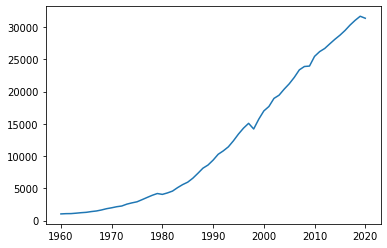

In [127]:
tkorea_data.PerCapita_GDP_2015USD.plot()

In [134]:
columns.sort()
for col in columns:
    print(col)

AggForestFish_PctGDP
BroadMoney_PctGDP
CoalRents_PctGDP
Cred2Private_PctGDP
CreditByBanks_PctGDP
CreditByFin_PctGDP
CurrentAcctBal_PctGDP
Defense_PctGDP
DomSavings_PctGDP
EducExp_PctGDP
EnergyUnit_GDP_PPP
Expense_PctGDP
ExportsGoodServices_PctGDP
FinalConsumpExp_PctGDP
ForeignInvstInflow_PctGDP
ForeignInvstOutflow_PctGDP
ForestRents_PctGDP
GDPGrowth_Pct
GDP_2015USD
GDP_LCU
GDP_LCU
GDP_PctGrowth
GDP_USD
GovtConsumption_PctGDP
GovtDebt_Total
GovtHealth_PctGDP
HealthExp_PctGDP
ImportGoodService_PctGDP
InServiceTrade_PctGDP
Industry_PctGDP
Inflation_Pct
Lend(+)Borrow(-)_PctGDP
Manufacturing_PctGDP
MerchTrade_PctGDP
Mineral_PctGDP
NatGas_PctGDP
NatResourcRents_PctGDP
OilRents_PctGDP
PerCapita_GDP_2015USD
PerCapita_GDP_LCU
PerCapita_GDP_LCU
PerCapita_GDP_USD
PerEmployed_GDP_2017PPP
Remittance_PctGDP
RevenueExGrants_PctGDP
RnD_PctGDP
Savings_PctGDP
Services_PctGDP
StocksTraded_PctGDP
TaxRev_PctGDP
Trade_PctGDP


In [138]:
pairs = sorted(series_pairs, key=lambda x: x[1])
for i in pairs:
    a, b = i
    print( f'{a: <40} \t {b}')

Agriculture, forestry, and fishing, value added (% of GDP) 	 AggForestFish_PctGDP
Broad money (% of GDP)                   	 BroadMoney_PctGDP
Coal rents (% of GDP)                    	 CoalRents_PctGDP
Domestic credit to private sector (% of GDP) 	 Cred2Private_PctGDP
Domestic credit to private sector by banks (% of GDP) 	 CreditByBanks_PctGDP
Domestic credit provided by financial sector (% of GDP) 	 CreditByFin_PctGDP
Current account balance (% of GDP)       	 CurrentAcctBal_PctGDP
Military expenditure (% of GDP)          	 Defense_PctGDP
Gross domestic savings (% of GDP)        	 DomSavings_PctGDP
Government expenditure on education, total (% of GDP) 	 EducExp_PctGDP
GDP per unit of energy use (PPP $ per kg of oil equivalent) 	 EnergyUnit_GDP_PPP
Expense (% of GDP)                       	 Expense_PctGDP
Exports of goods and services (% of GDP) 	 ExportsGoodServices_PctGDP
Final consumption expenditure (% of GDP) 	 FinalConsumpExp_PctGDP
Foreign direct investment, net inflows (% of G

In [139]:
len(set(new_series_names))

49

In [140]:
len(new_series_names)

51

In [ ]:
print('hello')
sleep(10)
print('world')